In [4]:
import py4DSTEM
import h5py

# Display the version of py4DSTEM
print(f"py4DSTEM version = {py4DSTEM.__version__}")

py4DSTEM version = 0.14.18


In [6]:
import os
print(os.getcwd())

/Users/louisg/PycharmProjects/m3-learning-m3_learning-dc4a2d5/LTSJ_exp


In [17]:
dirpath = "/Users/louisg/PycharmProjects/m3-learning-m3_learning-dc4a2d5/LTSJ_exp/Datasets/proj_data_27_06/"
filepath_probe = dirpath + "Diffraction VacuumProbe.dm4"
probe_dc = py4DSTEM.import_file(filepath_probe)

In [28]:
print(type(probe_dc))
print(probe_dc)

print("\nDatacube object attributes")
print(dir(probe_dc))

print("\nDatacube dimensions")
print(probe_dc.shape)        # print the shape of the data
print(probe_dc.data.shape)   # this is identical to the previous line
print(probe_dc.Rshape)       # print the shape of "real space"
print(probe_dc.Qshape)       # print the shape of "diffraction space"

<class 'py4DSTEM.datacube.datacube.DataCube'>
DataCube( A 4-dimensional array of shape (61, 44, 1024, 1024) called 'dm_dataset',
          with dimensions:

              Rx = [0.0,0.009966447949409485,0.01993289589881897,...] µm
              Ry = [0.0,0.009966447949409485,0.01993289589881897,...] µm
              Qx = [0.0,0.0013729393513558976,0.002745878702711795,...] A^-1
              Qy = [0.0,0.0013729393513558976,0.002745878702711795,...] A^-1
)

Datacube object attributes
['Q_Nx', 'Q_Ny', 'Q_pixel_size', 'Q_pixel_units', 'Qshape', 'R_N', 'R_Nx', 'R_Ny', 'R_pixel_size', 'R_pixel_units', 'Rshape', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_root_links', '_branch'

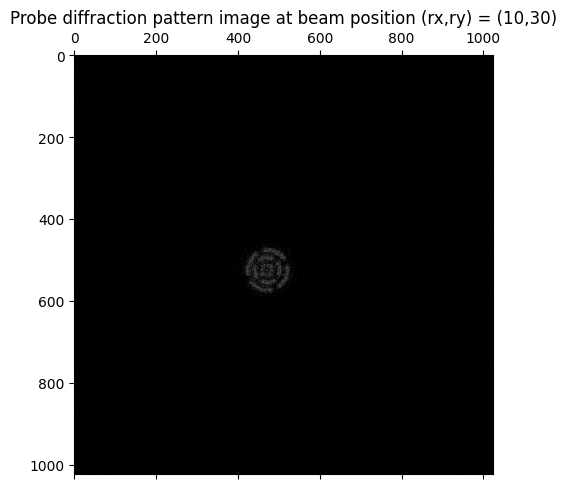

In [35]:
from py4DSTEM import show
# diffraction pattern image at beam position (rx,ry) = (10,30)
dp = probe_dc.data[10,30]
# Show the image
show(dp, title="Probe diffraction pattern image at beam position (rx,ry) = (10,30)")

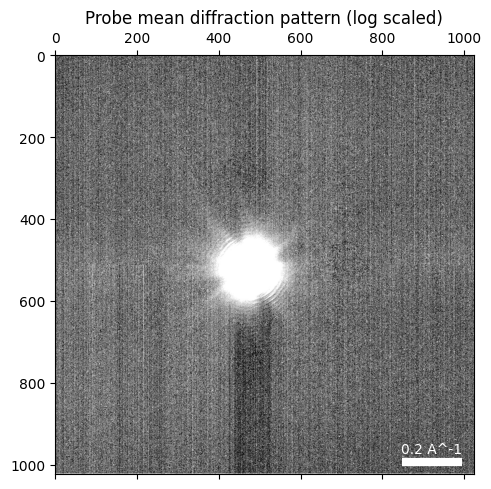

<class 'py4DSTEM.datacube.virtualdiffraction.VirtualDiffraction'>
VirtualDiffraction( A 2-dimensional array of shape (1024, 1024) called 'dp_mean',
                    with dimensions:

                        dim0 = [0,1,2,...] pixels
                        dim1 = [0,1,2,...] pixels
)


In [34]:
probe_dp_mean = probe_dc.get_dp_mean()
show(
    probe_dp_mean,
    scaling='log',
    title="Probe mean diffraction pattern (log scaled)"
)
print(type(probe_dp_mean))
print(probe_dp_mean)

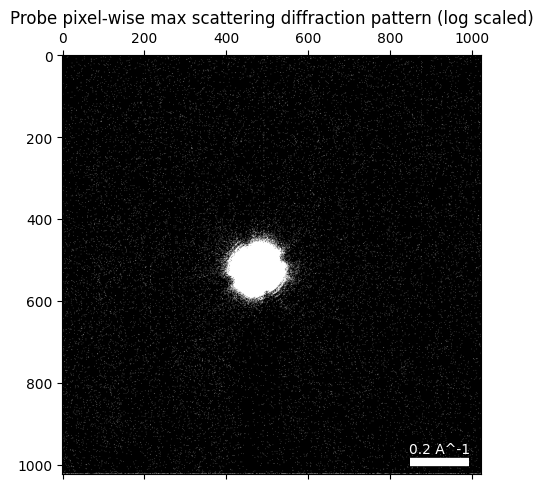

In [37]:
probe_dp_max = probe_dc.get_dp_max()
show(
    probe_dp_max,
    scaling='log',
    title="Probe pixel-wise max scattering diffraction pattern (log scaled)"
)

## Boracite

In [40]:
boracite_filepath = dirpath+"CuCl100-FIB1-02.h5"
boracite_dc = py4DSTEM.read(
    filepath = boracite_filepath,
)

py4DSTEM file version 0.7.0
Index     Type              Shape                   Name                                                  
-----     ----              -----                   ----                                                  
  0       PointListArray    (499, 124, 3, -1)       braggpeaks                                            


In [39]:
probe = boracite_dc.get_vacuum_probe()
py4DSTEM.show(probe.probe)

AttributeError: 'NoneType' object has no attribute 'get_vacuum_probe'

In [41]:
f = h5py.File(boracite_filepath, "r")


def print_attrs(name, obj):
    print(name)
    for key, val in obj.attrs.items():
        print("%s %s" % (key, val))


f.visititems(print_attrs)

4DSTEM_experiment
emd_group_type 2
version_major 0
version_minor 7
4DSTEM_experiment/data
4DSTEM_experiment/data/counted_datacubes
4DSTEM_experiment/data/datacubes
4DSTEM_experiment/data/diffractionslices
4DSTEM_experiment/data/pointlistarrays
4DSTEM_experiment/data/pointlistarrays/braggpeaks
coordinates b"[('qx', '<f8'), ('qy', '<f8'), ('intensity', '<f8')]"
dimensions 3
metadata -1
4DSTEM_experiment/data/pointlistarrays/braggpeaks/data
4DSTEM_experiment/data/pointlists
4DSTEM_experiment/data/realslices
4DSTEM_experiment/log
4DSTEM_experiment/log/log_item_0
function b'read'
time b'2020717__0:18:18'
version 0.8.0
4DSTEM_experiment/log/log_item_0/inputs
filename b'G:/4DSTEM/NCEM_August_2019/CuCl/100FIB1/CuCL-100-FIB1-02-185mm/CuCl100-FIB1-02_.gtg'
load b'gatan_bin'
4DSTEM_experiment/log/log_item_1
function b'save_from_dataobject_list'
time b'2020717__13:57:4'
version 0.8.0
4DSTEM_experiment/log/log_item_1/inputs
dataobject_list b'[<py4DSTEM.file.datastructure.pointlist.PointListArray ob

In [43]:
print(type(boracite_dc))

<class 'NoneType'>
